In [1]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()


In [12]:
dir(digits)
df = pd.DataFrame(digits.data,columns = digits.feature_names)

In [13]:
df['target']=digits.target

In [14]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis = 1),df.target,test_size =0.3,random_state = 2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from sklearn.model_selection import GridSearchCV

cl = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[3,4,5,6,7,8,9,10]},cv=5,return_train_score = False)
cl.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
pd.DataFrame(cl.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003570,1.681414e-03,0.070804,0.043469,3,{'n_neighbors': 3},0.992063,0.984127,0.988048,0.976096,0.988048,0.985676,0.005408,2
1,0.002801,4.004755e-04,0.049180,0.000767,4,{'n_neighbors': 4},0.992063,0.980159,0.984064,0.972112,0.988048,0.983289,0.006855,4
2,0.003151,8.826947e-04,0.051721,0.000911,5,{'n_neighbors': 5},0.988095,0.984127,0.984064,0.988048,0.988048,0.986476,0.001944,1
3,0.003200,4.051425e-04,0.049731,0.001091,6,{'n_neighbors': 6},0.988095,0.980159,0.980080,0.976096,0.988048,0.982495,0.004784,5
4,0.002480,4.508714e-04,0.049874,0.000742,7,{'n_neighbors': 7},0.984127,0.980159,0.988048,0.980080,0.988048,0.984092,0.003546,3
5,0.002656,4.297041e-04,0.049598,0.000616,8,{'n_neighbors': 8},0.984127,0.968254,0.980080,0.976096,0.984064,0.978524,0.005931,7
6,0.003000,6.325960e-07,0.049474,0.000939,9,{'n_neighbors': 9},0.984127,0.976190,0.980080,0.980080,0.988048,0.981705,0.004045,6
7,0.002599,4.919313e-04,0.049661,0.000798,10,{'n_neighbors': 10},0.984127,0.976190,0.980080,0.968127,0.984064,0.978518,0.005967,8


In [25]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn.score(x_test,y_test)

0.9740740740740741

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 41]], dtype=int64)

Text(83.22222222222221, 0.5, 'True')

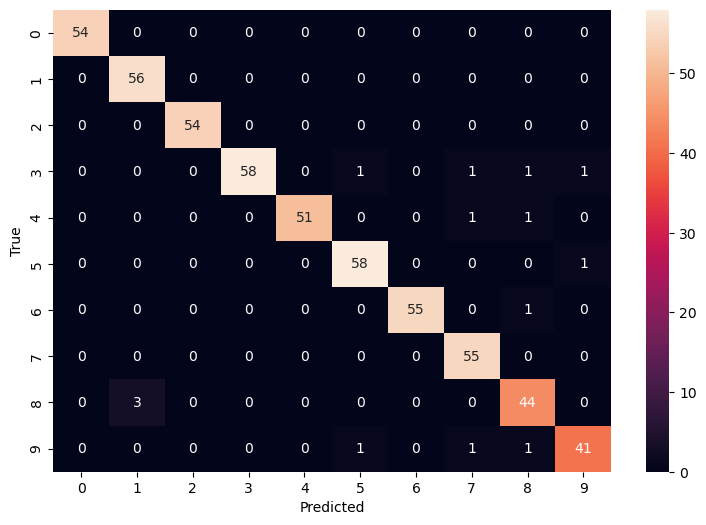

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        62
           4       1.00      0.96      0.98        53
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        56
           7       0.95      1.00      0.97        55
           8       0.92      0.94      0.93        47
           9       0.95      0.93      0.94        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

